# 得られたembeddingを可視化したりする

In [29]:
import json
from pathlib import Path

In [88]:
embedding_dim=5
bow_threshold=10000
json_path= Path(f"../result/embeddings_{bow_threshold}_{embedding_dim}.json")

In [89]:
with json_path.open("r") as f:
    embeddings=json.load(f)

In [90]:
embeddings

{'capo': {'-1': [-0.07792773097753525,
   -0.060524653643369675,
   0.07726976275444031,
   -0.02385975979268551,
   0.04562262445688248],
  '-2': [-0.01262444257736206,
   0.02286733314394951,
   0.05109073221683502,
   0.09203898161649704,
   -0.1305168867111206],
  '-3': [-0.1581263691186905,
   0.06912362575531006,
   0.051874157041311264,
   -0.05105556175112724,
   -0.04609163850545883],
  '-4': [-0.011947999708354473,
   0.15394474565982819,
   0.036029472947120667,
   0.04824259132146835,
   -0.10671638697385788],
  '-5': [0.02861279994249344,
   -0.04811745136976242,
   -0.11284653842449188,
   -0.010652131401002407,
   -0.1007041409611702],
  '0': [0.01945549063384533,
   -0.07956021279096603,
   0.08099450170993805,
   0.07825532555580139,
   -0.10778560489416122],
  '1': [-0.0443434901535511,
   0.10406459867954254,
   -0.1490936130285263,
   -0.12279641628265381,
   0.14582769572734833]},
 'chord': {'A': [-0.7326207756996155,
   -0.0027221699710935354,
   0.852174043655395

In [94]:
import numpy as np
from sklearn.decomposition import PCA  
def get_pca_embeddings(embeddings,n_compenents):
    keys=[]
    embeddings_mat=[]
    for kind, em in embeddings.items(): 
        for key, embedding in em.items():
            keys.append(key)
            embeddings_mat.append(embedding)
        
    pca = PCA(n_components=n_compenents)                     # 3次元に圧縮するPCAインスタンスを作成
    X = pca.fit_transform(np.array(embeddings_mat))
    
    result={}
    for i in range(len(keys)):
        result[keys[i]]=X[i]
    return result


In [102]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_embeddings(embeddings,target_chords=None):
    if len(list(embeddings.values())[0]) != 2:
        raise Exception("Invalid embeddings given.")
    x1=[]
    x2=[]
    if target_chords is None:
        target_chords=[]
        for chord, embedding in embeddings.items():
            x1.append(embedding[0])
            x2.append(embedding[1])
            target_chords.append(chord)
    else:
        for target_chord in target_chords:
            x1.append(embeddings[target_chord][0])
            x2.append(embeddings[target_chord][1])
    
    for (i,j,k) in zip(x1,x2,target_chords):
            plt.plot(i,j)
            plt.annotate(k, xy=(i, j))
    plt.show()

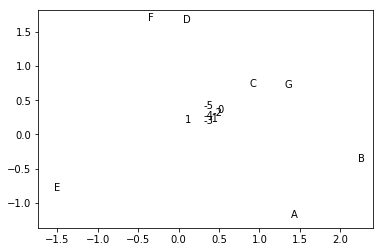

In [112]:
pca_embeddings=get_pca_embeddings(embeddings,2) 
plot_embeddings(pca_embeddings,target_chords=["A","B","C","D","E","F","G","-1","-2","-3","-4","-5","0","1"])